# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Carregue os dados da tarefa anterior

In [63]:
import plotly.express as px
from plotly import graph_objects
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import timedelta
import plotly.graph_objects as go

In [37]:
%%time
ativos = ['NTDOY', 'NVDA', 'AMD']
dt_ini = '2024-01-01'

data = yf.download(ativos, start=dt_ini)
data.head()

[*********************100%***********************]  3 of 3 completed

CPU times: total: 266 ms
Wall time: 888 ms


Price            Close                          High                    \
Ticker             AMD  NTDOY       NVDA         AMD  NTDOY       NVDA   
Date                                                                     
2024-01-02  138.580002  12.80  48.154346  144.399994  12.97  49.281026   
2024-01-03  135.320007  12.70  47.555519  137.429993  12.89  48.170343   
2024-01-04  136.009995  12.42  47.984398  137.699997  12.52  48.486255   
2024-01-05  138.580002  12.49  49.083080  141.009995  12.60  49.532953   
2024-01-08  146.179993  12.79  52.238190  147.149994  12.80  52.260187   

Price              Low                          Open                    \
Ticker             AMD  NTDOY       NVDA         AMD  NTDOY       NVDA   
Date                                                                     
2024-01-02  137.429993  12.80  47.581511  144.279999  12.97  49.230042   
2024-01-03  133.740005  12.60  47.306589  135.710007  12.80  47.471543   
2024-01-04  134.000000  12.35  47.494535  134.300003  12.52  47.753461   
2024-01-05  136.440002  12.42  48.292304  136.779999  12.42  48.448262   
2024-01-08  140.149994  12.45  49.464978  140.360001  12.55  49.497969   

Price         Volume                      
Ticker           AMD    NTDOY       NVDA  
Date                                      
2024-01-02  64902000   622200  411254000  
2024-01-03  61988600   439200  320896000  
2024-01-04  58610300   515000  306535000  
2024-01-05  69595000   421300  415039000  
2024-01-08  71756900  1120000  642510000

In [38]:
data.shape

(298, 15)

In [39]:
for ativo in ativos:
    data[('High-Low', ativo)] = data[('High', ativo)] - data[('Low', ativo)]

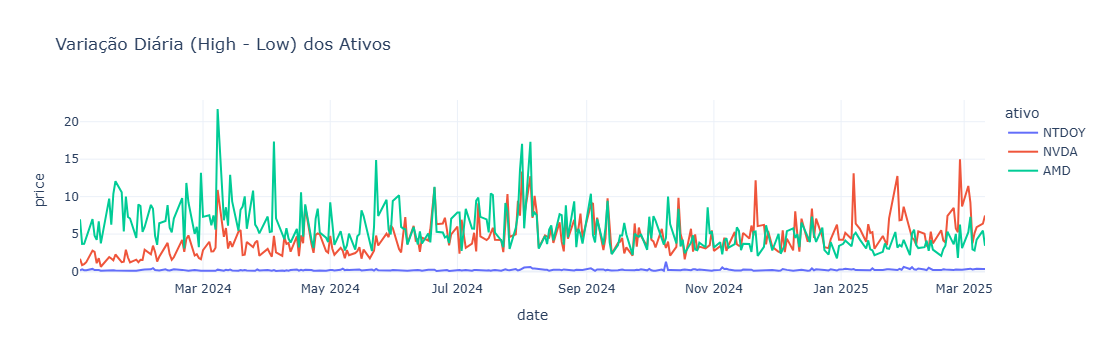

In [40]:
high_low_df = data['High-Low'].stack().reset_index()
high_low_df.columns = ['date', 'ativo', 'price'] 

fig = px.line(high_low_df, x="date", y="price", color='ativo', template='plotly_white',
              title='Variação Diária (High - Low) dos Ativos')
fig.show()

In [42]:
high_low_df.head()

,date,ativo,price
0,2024-01-02,NTDOY,0.170000
1,2024-01-02,NVDA,1.699515
2,2024-01-02,AMD,6.970001
3,2024-01-03,NTDOY,0.290000
4,2024-01-03,NVDA,0.863754


In [48]:
high_low_df['date'] = pd.to_datetime(high_low_df['date'])

high_low_df = high_low_df.sort_values(['ativo', 'date'])

high_low_df['media_movel_90'] = high_low_df.groupby('ativo')['price'].transform(lambda x: x.rolling(window=90, min_periods=1).mean())

In [49]:
high_low_df

,date,ativo,price,media_movel_90
2,2024-01-02,AMD,6.970001,6.970001
5,2024-01-03,AMD,3.689987,5.329994
8,2024-01-04,AMD,3.699997,4.786662
11,2024-01-05,AMD,4.569992,4.732494
14,2024-01-08,AMD,7.000000,5.185995
...,...,...,...,...
880,2025-03-05,NVDA,3.769997,5.322899
883,2025-03-06,NVDA,5.129997,5.324681
886,2025-03-07,NVDA,5.920006,5.358350
889,2025-03-10,NVDA,6.389999,5.392353


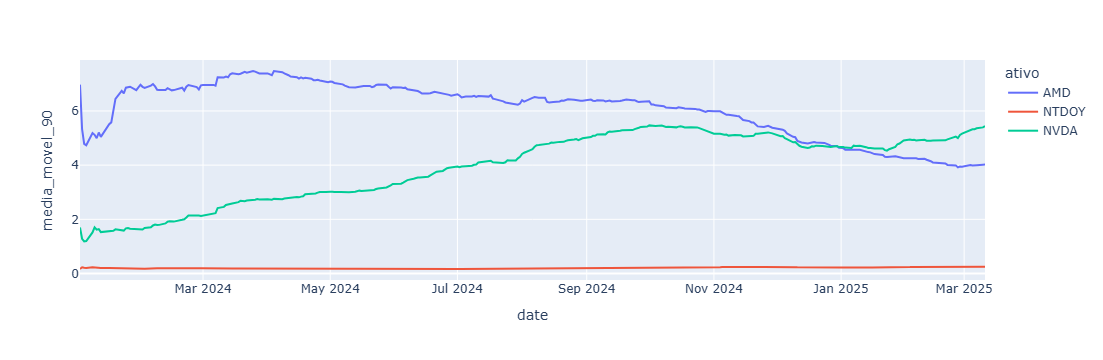

In [54]:
fig = px.line(high_low_df, x="date", y="media_movel_90", color='ativo')
fig.show()

#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

In [57]:
high_low_df['desvio_padrao_90'] = high_low_df.groupby('ativo')['price'].transform(lambda x: x.rolling(window=90).std())

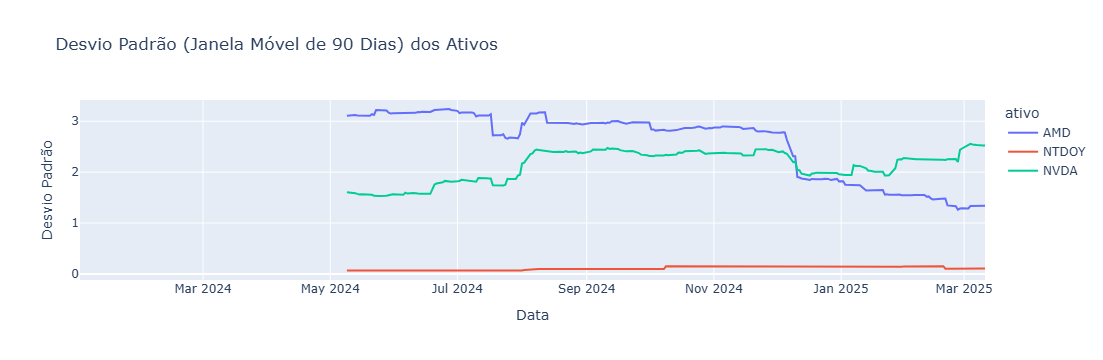

In [58]:
fig = px.line(high_low_df, x="date", y="desvio_padrao_90", color='ativo',
              title='Desvio Padrão (Janela Móvel de 90 Dias) dos Ativos')
fig.update_layout(xaxis_title='Data', yaxis_title='Desvio Padrão')
fig.show()

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

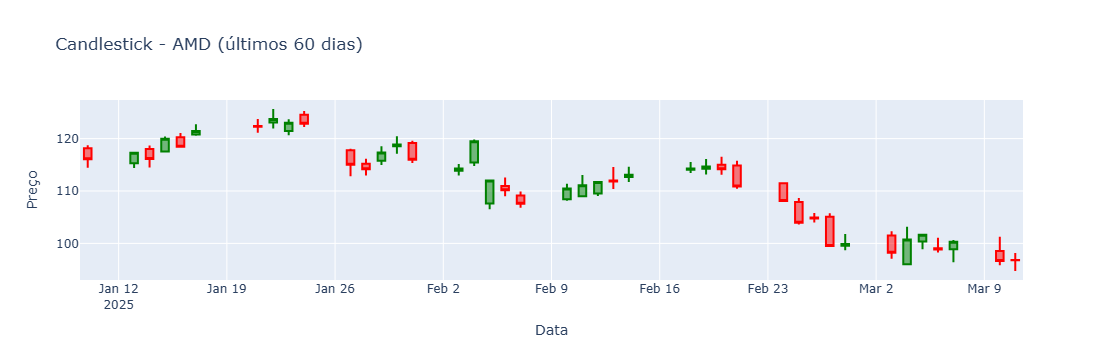

In [65]:
fim = data.index.max()
inicio = fim - timedelta(days=60)
df_amd = data.loc[inicio:fim]


fig = go.Figure(data=[go.Candlestick(
    x=df_amd.index,
    open=df_amd[('Open', 'AMD')],
    high=df_amd[('High', 'AMD')],
    low=df_amd[('Low', 'AMD')],
    close=df_amd[('Close', 'AMD')],
    increasing_line_color='green',
    decreasing_line_color='red',
    name='AMD'
)])

fig.update_layout(
    title='Candlestick - AMD (últimos 60 dias)',
    xaxis_title='Data',
    yaxis_title='Preço',
    xaxis_rangeslider_visible=False
)

fig.show()